In [1]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.tytf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('../Data/강남 일별 시간대별 승객유형별 승하차인원 최종.csv')

In [3]:
df.head()

,datetime,연,월,일,시간,요일,주말,공휴일,외국인,우대권,일반
0,2022-06-01 05:00:00,2022,6,1,5,2,0,1,6.0,116.0,939.0
1,2022-06-01 06:00:00,2022,6,1,6,2,0,1,0.0,349.0,1085.0
2,2022-06-01 07:00:00,2022,6,1,7,2,0,1,0.0,232.0,1280.0
3,2022-06-01 08:00:00,2022,6,1,8,2,0,1,0.0,205.0,2402.0
4,2022-06-01 09:00:00,2022,6,1,9,2,0,1,1.0,249.0,3740.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  14620 non-null  object 
 1   연         14620 non-null  int64  
 2   월         14620 non-null  int64  
 3   일         14620 non-null  int64  
 4   시간        14620 non-null  int64  
 5   요일        14620 non-null  int64  
 6   주말        14620 non-null  int64  
 7   공휴일       14620 non-null  int64  
 8   외국인       14620 non-null  float64
 9   우대권       14620 non-null  float64
 10  일반        14620 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.2+ MB


In [5]:
# 'datetime' 컬럼을 datetime 형식으로 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# 변환 후 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  14620 non-null  datetime64[ns]
 1   연         14620 non-null  int64         
 2   월         14620 non-null  int64         
 3   일         14620 non-null  int64         
 4   시간        14620 non-null  int64         
 5   요일        14620 non-null  int64         
 6   주말        14620 non-null  int64         
 7   공휴일       14620 non-null  int64         
 8   외국인       14620 non-null  float64       
 9   우대권       14620 non-null  float64       
 10  일반        14620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.2 MB


In [6]:
import pandas as pd

# 수정된 기본 비율
base_age_group_ratios = {
    '10대': 0.08,
    '20대': 0.20,
    '30대': 0.35,
    '40대': 0.25,
    '50대 이상': 0.12
}

# 수정된 시간대별 가중치
time_age_group_weights = {
    '출근시간': {'10대': 0.6, '20대': 1.2, '30대': 1.5, '40대': 1.4, '50대 이상': 0.8},
    '퇴근시간': {'10대': 0.7, '20대': 1.1, '30대': 1.2, '40대': 1.3, '50대 이상': 1.0},
    '일반시간': {'10대': 1.2, '20대': 0.9, '30대': 0.8, '40대': 0.7, '50대 이상': 1.4}
}

# 수정된 요일별 가중치
weekday_age_group_weights = {
    '평일': {'10대': 0.8, '20대': 1.0, '30대': 1.3, '40대': 1.2, '50대 이상': 0.7},
    '주말': {'10대': 1.5, '20대': 1.3, '30대': 0.7, '40대': 0.6, '50대 이상': 1.4},
    '공휴일': {'10대': 1.4, '20대': 1.2, '30대': 0.8, '40대': 0.7, '50대 이상': 1.5}
}

# 시간대 분류 함수
def get_time_period(hour):
    if 7 <= hour <= 9:
        return '출근시간'
    elif 17 <= hour <= 19:
        return '퇴근시간'
    else:
        return '일반시간'

# 요일 분류 함수
def get_weekday_type(is_weekend, is_holiday):
    if is_holiday:
        return '공휴일'
    return '주말' if is_weekend else '평일'

# 나이대별 승객 수 계산
def calculate_age_group_counts(row):
    time_period = get_time_period(row['시간'])
    weekday_type = get_weekday_type(row['주말'], row['공휴일'])
    
    # 시간대와 요일별 가중치를 적용한 나이대 비율 계산
    adjusted_ratios = {
        age_group: base_age_group_ratios[age_group] *
                   time_age_group_weights[time_period][age_group] *
                   weekday_age_group_weights[weekday_type][age_group]
        for age_group in base_age_group_ratios
    }
    
    # 승객 수 계산
    total = sum(adjusted_ratios.values())
    adjusted_ratios = {k: v / total for k, v in adjusted_ratios.items()}  # 비율 정규화
    return {age_group: round(row['일반'] * ratio) for age_group, ratio in adjusted_ratios.items()}  # 소수점 반올림

# 나이대별 승객 수 초기화 및 계산 적용
age_group_columns = ['10대', '20대', '30대', '40대', '50대 이상']

# 각 row에 대해 나이대별 승객 수 계산
for index, row in df.iterrows():
    age_group_counts = calculate_age_group_counts(row)
    for age_group, count in age_group_counts.items():
        df.at[index, age_group] = count

# '일반' 컬럼 삭제 (나이대로 분리되었으므로 불필요)
df = df.drop(columns=['일반'])

# 결과 확인
df.head()

,datetime,연,월,일,시간,요일,주말,공휴일,외국인,우대권,10대,20대,30대,40대,50대 이상
0,2022-06-01 05:00:00,2022,6,1,5,2,0,1,6.0,116.0,133.0,214.0,222.0,121.0,249.0
1,2022-06-01 06:00:00,2022,6,1,6,2,0,1,0.0,349.0,154.0,247.0,256.0,140.0,288.0
2,2022-06-01 07:00:00,2022,6,1,7,2,0,1,0.0,232.0,74.0,317.0,462.0,269.0,158.0
3,2022-06-01 08:00:00,2022,6,1,8,2,0,1,0.0,205.0,139.0,594.0,867.0,505.0,297.0
4,2022-06-01 09:00:00,2022,6,1,9,2,0,1,1.0,249.0,216.0,925.0,1349.0,787.0,463.0


In [7]:
# 우대권과 외국인을 뒤로 이동시키기
columns_order = [col for col in df.columns if col not in ['우대권', '외국인']] + ['우대권', '외국인']
df = df[columns_order]

In [8]:
df.head()

,datetime,연,월,일,시간,요일,주말,공휴일,10대,20대,30대,40대,50대 이상,우대권,외국인
0,2022-06-01 05:00:00,2022,6,1,5,2,0,1,133.0,214.0,222.0,121.0,249.0,116.0,6.0
1,2022-06-01 06:00:00,2022,6,1,6,2,0,1,154.0,247.0,256.0,140.0,288.0,349.0,0.0
2,2022-06-01 07:00:00,2022,6,1,7,2,0,1,74.0,317.0,462.0,269.0,158.0,232.0,0.0
3,2022-06-01 08:00:00,2022,6,1,8,2,0,1,139.0,594.0,867.0,505.0,297.0,205.0,0.0
4,2022-06-01 09:00:00,2022,6,1,9,2,0,1,216.0,925.0,1349.0,787.0,463.0,249.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  14620 non-null  datetime64[ns]
 1   연         14620 non-null  int64         
 2   월         14620 non-null  int64         
 3   일         14620 non-null  int64         
 4   시간        14620 non-null  int64         
 5   요일        14620 non-null  int64         
 6   주말        14620 non-null  int64         
 7   공휴일       14620 non-null  int64         
 8   10대       14620 non-null  float64       
 9   20대       14620 non-null  float64       
 10  30대       14620 non-null  float64       
 11  40대       14620 non-null  float64       
 12  50대 이상    14620 non-null  float64       
 13  우대권       14620 non-null  float64       
 14  외국인       14620 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(7)
memory usage: 1.7 MB


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 데이터 준비
features = ['연', '월', '일', '시간', '요일', '주말', '공휴일']  # 입력 특징
targets = ['10대', '20대', '30대', '40대', '50대 이상', '우대권', '외국인']  # 출력 타겟

X = df[features]
y = df[targets]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)

# 모델 학습 및 예측
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "KNN": knn_model
}

results = {}

for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    # 예측
    y_pred = model.predict(X_test)
    # 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}

# 결과 출력
results_df = pd.DataFrame(results).T  # Transpose for better readability
print(results_df)

                         MSE        R²
Random Forest   16848.049211  0.932766
XGBoost         12361.498375  0.951369
KNN            137572.937004  0.823551


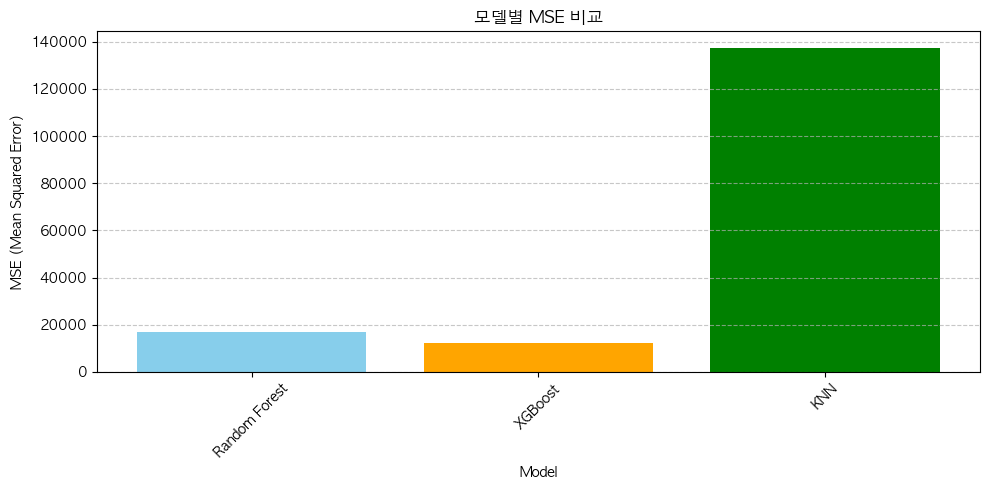

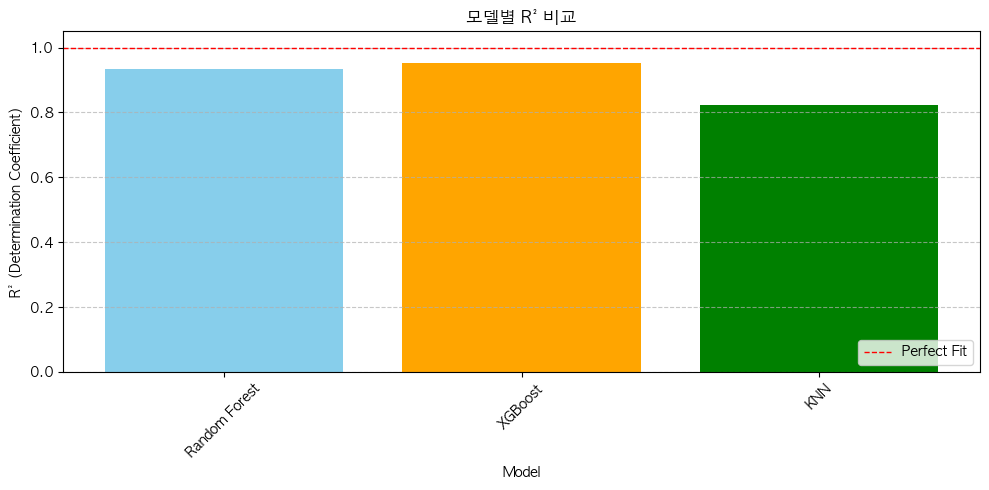

In [11]:
import matplotlib.pyplot as plt

# 모델 성능 데이터프레임
results_df = pd.DataFrame(results).T

# MSE 차트
plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df['MSE'], color=['skyblue', 'orange', 'green'])
plt.title('모델별 MSE 비교')
plt.ylabel('MSE (Mean Squared Error)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# R² 차트
plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df['R²'], color=['skyblue', 'orange', 'green'])
plt.title('모델별 R² 비교')
plt.ylabel('R² (Determination Coefficient)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='Perfect Fit')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 5, 10]
}

# XGBoost 모델 초기화
xgb_model = XGBRegressor(random_state=42)

# GridSearchCV로 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 R² 점수:", grid_search.best_score_)

In [12]:
from xgboost import XGBRegressor

# 최적의 하이퍼파라미터를 반영한 XGBoost 모델 초기화
optimized_xgb_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=8,
    min_child_weight=1,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

# 모델 학습
optimized_xgb_model.fit(X_train, y_train)

# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

y_pred = optimized_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"최적화된 XGBoost - MSE: {mse}")
print(f"최적화된 XGBoost - R²: {r2}")

최적화된 XGBoost - MSE: 9662.122083820781
최적화된 XGBoost - R²: 0.9545843485981231


In [13]:
from sklearn.model_selection import cross_val_score

# 교차 검증
cv_scores = cross_val_score(optimized_xgb_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.76782238 0.91967804 0.93166189 0.93033692 0.9385963 ]
Mean CV Score: 0.8976191070924011


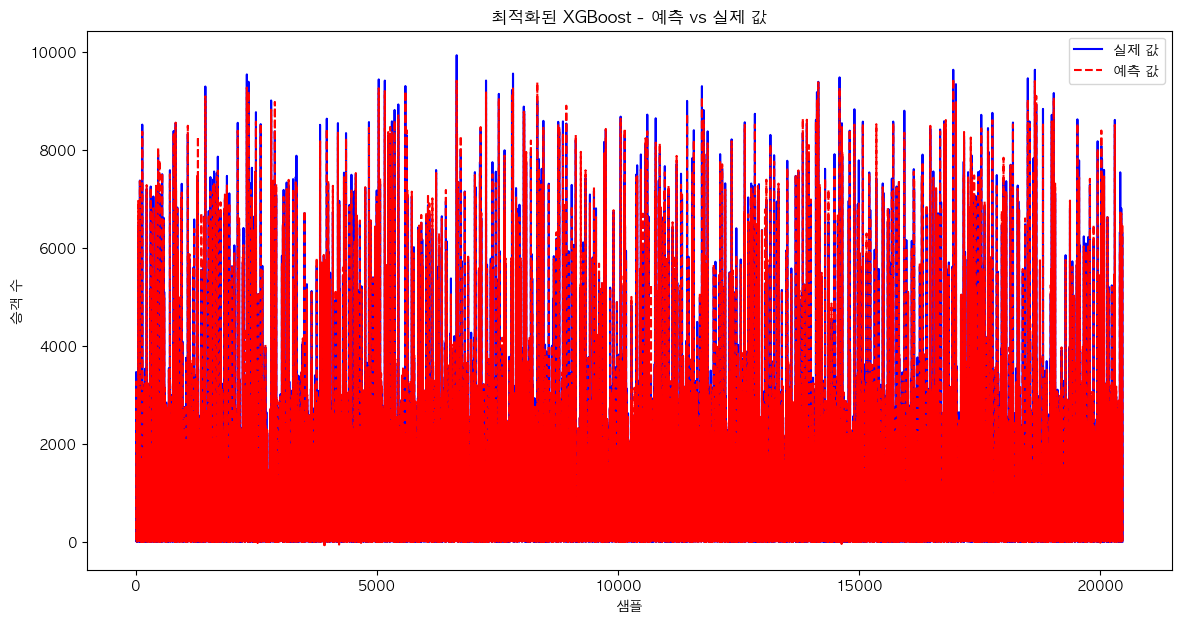

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test.values.flatten(), label='실제 값', color='blue')
plt.plot(y_pred.flatten(), label='예측 값', color='red', linestyle='dashed')
plt.legend()
plt.title('최적화된 XGBoost - 예측 vs 실제 값')
plt.xlabel('샘플')
plt.ylabel('승객 수')
plt.show()

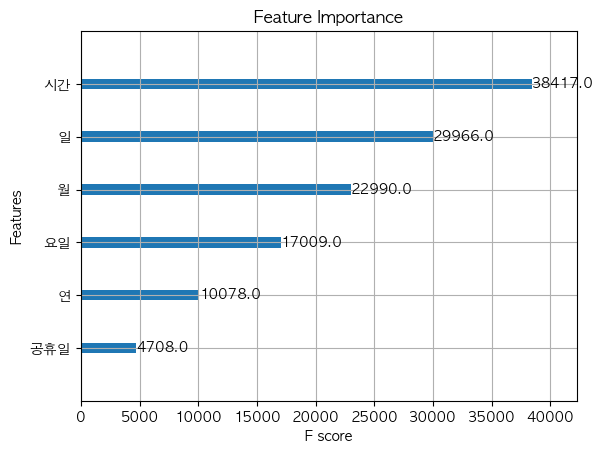

In [15]:
from xgboost import plot_importance

plot_importance(optimized_xgb_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

In [22]:
import pandas as pd
import holidays
from datetime import datetime

# 한국 공휴일 정보
kr_holidays = holidays.KR()

# 특징 생성 함수
def create_features_for_datetime(dt):
    """datetime에서 특징을 생성"""
    return {
        'datetime': dt,
        '연': dt.year,
        '월': dt.month,
        '일': dt.day,
        '시간': dt.hour,
        '요일': dt.weekday(),
        '주말': 1 if dt.weekday() >= 5 else 0,
        '공휴일': 1 if dt in kr_holidays else 0,
    }

# 미래 예측 함수
def predict_passenger_count(model, future_datetime):
    """미래 승객 수 예측"""
    # datetime에서 특징 생성
    feature = create_features_for_datetime(future_datetime)
    feature_df = pd.DataFrame([feature])
    
    # 필요한 입력 데이터만 선택
    feature_columns = ['연', '월', '일', '시간', '요일', '주말', '공휴일']
    feature_input = feature_df[feature_columns]
    
    # 예측 수행
    prediction = model.predict(feature_input)
    
    # 예측 결과 처리: 각 값을 소수점 반올림 및 0보다 작은 값 처리
    prediction = [max(0, round(float(val))) for val in prediction[0]]
    return {
        '10대': prediction[0],
        '20대': prediction[1],
        '30대': prediction[2],
        '40대': prediction[3],
        '50대 이상': prediction[4],
        '우대권': prediction[5],
        '외국인': prediction[6]
    }

# 특정 날짜의 시간대별 예측 함수
def predict_specific_date_all_hours(model, date_input):
    """
    특정 날짜의 0시부터 23시까지 모든 시간대의 승객 수 예측
    1시~4시는 제외
    """
    # date_input을 datetime 형식으로 변환
    specific_date = datetime.strptime(date_input, '%Y%m%d')
    
    predictions = []
    for hour in range(24):
        # 1시~4시 제외
        if 1 <= hour <= 4:
            continue
        current_time = specific_date.replace(hour=hour, minute=0, second=0, microsecond=0)
        predicted_count = predict_passenger_count(model, current_time)
        predictions.append({
            'datetime': current_time.strftime('%Y-%m-%d %H:%M:%S'),
            **predicted_count  # 딕셔너리 병합
        })
    
    # 결과를 데이터프레임으로 반환
    return pd.DataFrame(predictions)

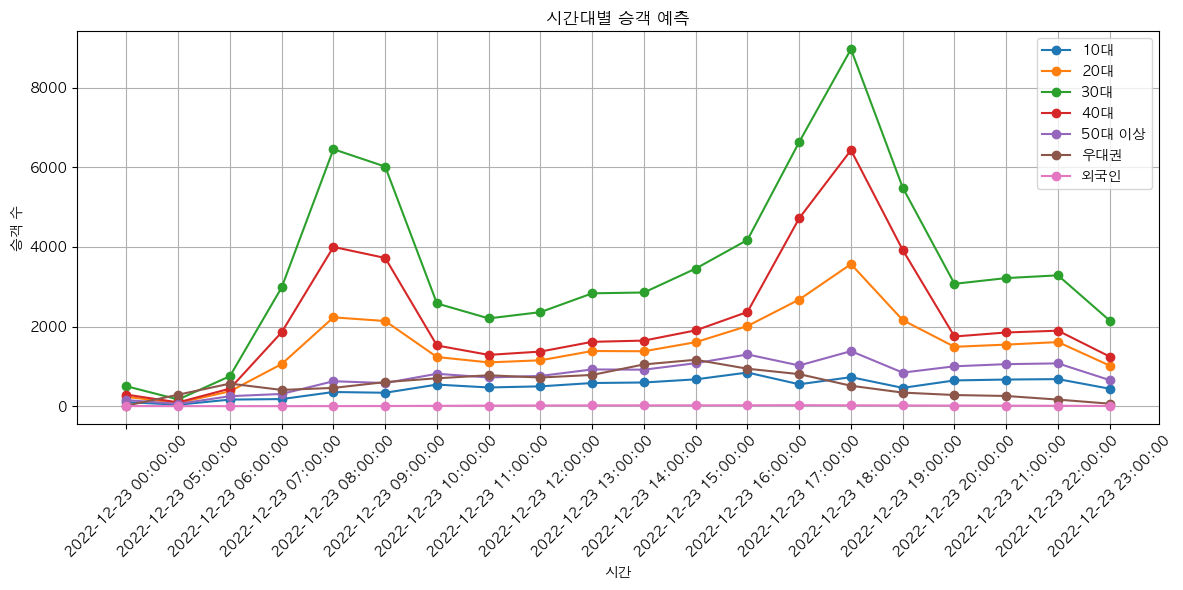

,datetime,10대,20대,30대,40대,50대 이상,우대권,외국인,승객수 합계
0,2022-12-23 00:00:00,100,232,500,289,151,13,2,1287
1,2022-12-23 05:00:00,36,81,167,94,56,287,0,721
2,2022-12-23 06:00:00,164,372,753,440,250,566,0,2545
3,2022-12-23 07:00:00,177,1058,2984,1857,306,407,0,6789
4,2022-12-23 08:00:00,355,2231,6457,4001,626,458,1,14129
5,2022-12-23 09:00:00,336,2139,6020,3724,580,604,3,13406
6,2022-12-23 10:00:00,541,1234,2580,1524,813,700,8,7400
7,2022-12-23 11:00:00,469,1099,2205,1288,720,775,13,6569
8,2022-12-23 12:00:00,497,1152,2362,1371,759,719,17,6877
9,2022-12-23 13:00:00,581,1385,2835,1616,922,784,19,8142


In [23]:
import pandas as pd

# 예측 수행
date_input = "20221223"  # 예측할 날짜 (YYYYMMDD)
predictions_for_date = predict_specific_date_all_hours(optimized_xgb_model, date_input)

# 승객수 합계 추가
predictions_for_date['승객수 합계'] = (
    predictions_for_date['10대'] +
    predictions_for_date['20대'] +
    predictions_for_date['30대'] +
    predictions_for_date['40대'] +
    predictions_for_date['50대 이상'] +
    predictions_for_date['우대권'] +
    predictions_for_date['외국인']
)

import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 6))
for column in ['10대', '20대', '30대', '40대', '50대 이상', '우대권', '외국인']:
    plt.plot(predictions_for_date['datetime'], predictions_for_date[column], label=column, marker='o')

plt.xticks(rotation=45)
plt.title("시간대별 승객 예측")
plt.xlabel("시간")
plt.ylabel("승객 수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

predictions_for_date

In [26]:
# 'datetime' 컬럼을 datetime 형식으로 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# 특정 날짜 필터링
specific_date = "2022-12-23"  # 원하는 날짜 (YYYY-MM-DD)
filtered_data = df[df['datetime'].dt.date == datetime.strptime(specific_date, '%Y-%m-%d').date()]

# 특정 열만 선택
filtered_data = filtered_data[['datetime', '10대', '20대', '30대', '40대', '50대 이상', '우대권', '외국인']]

# 숫자형 데이터를 정수로 변환
filtered_data[['10대', '20대', '30대', '40대', '50대 이상', '우대권', '외국인']] = filtered_data[
    ['10대', '20대', '30대', '40대', '50대 이상', '우대권', '외국인']
].astype(int)

# 승객수 합계 열 추가
filtered_data['승객수 합계'] = filtered_data[['10대', '20대', '30대', '40대', '50대 이상', '우대권', '외국인']].sum(axis=1)

# 결과 출력
filtered_data

,datetime,10대,20대,30대,40대,50대 이상,우대권,외국인,승객수 합계
4099,2022-12-23 00:00:00,98,229,463,267,150,15,3,1225
4100,2022-12-23 05:00:00,42,99,199,115,64,301,0,820
4101,2022-12-23 06:00:00,157,368,745,430,241,570,0,2511
4102,2022-12-23 07:00:00,168,1048,2980,1834,293,401,0,6724
4103,2022-12-23 08:00:00,358,2239,6368,3919,627,456,0,13967
4104,2022-12-23 09:00:00,331,2067,5879,3618,579,593,0,13067
4105,2022-12-23 10:00:00,543,1272,2572,1484,831,678,5,7385
4106,2022-12-23 11:00:00,470,1102,2228,1285,720,748,15,6568
4107,2022-12-23 12:00:00,504,1180,2386,1377,771,651,9,6878
4108,2022-12-23 13:00:00,607,1423,2878,1660,930,741,22,8261


In [27]:
from joblib import dump

# 모델 저장
dump(optimized_xgb_model, "../Data/model.joblib")

print("모델이 'model.joblib'로 저장되었습니다.")

모델이 'model.joblib'로 저장되었습니다.
